In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [346]:
ds = pd.read_csv(r'C:\Users\Jaya Krishna Sai\Desktop\Python\segcluster\Regression\USA_Housing.csv')

In [347]:
ds.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [348]:
ds.drop('Address', axis=1, inplace=True)

In [349]:
scaler = MinMaxScaler()
ds = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)

In [350]:
ds.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


In [351]:
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(ds)
ds['outliers'] = outliers

clean_data = ds[ds['outliers'] == 1]

In [352]:
clean_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,outliers
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210,1
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369,1
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192,1
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384,1
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702,1


In [353]:
X = clean_data.drop('Price', axis=1)
y = clean_data['Price']

In [354]:
X.shape, y.shape

((4500, 6), (4500,))

In [355]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [356]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3600, 6), (900, 6), (3600,), (900,))

In [357]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [358]:
y_pred = lr.predict(X_test)

In [359]:
y_pred

array([0.53339046, 0.44410972, 0.4529182 , 0.4124899 , 0.44414482,
       0.47886293, 0.50799837, 0.43122774, 0.35138333, 0.51645277,
       0.52219236, 0.48121   , 0.54840927, 0.53933973, 0.51410436,
       0.54157432, 0.50153256, 0.60920942, 0.43396346, 0.37625084,
       0.33031387, 0.59779716, 0.74818347, 0.67759628, 0.62195188,
       0.58178265, 0.46415248, 0.58823777, 0.42266523, 0.51108063,
       0.42988672, 0.37101135, 0.60795515, 0.46027176, 0.37902132,
       0.43257951, 0.56721419, 0.55959517, 0.36891604, 0.48016785,
       0.36080367, 0.34788814, 0.40303144, 0.59255774, 0.45631556,
       0.62159141, 0.33092672, 0.43766432, 0.50272128, 0.61191089,
       0.31037531, 0.44988286, 0.44808892, 0.31479909, 0.48794156,
       0.7042277 , 0.57144653, 0.40594646, 0.40721163, 0.42744752,
       0.41144693, 0.31149683, 0.69724911, 0.36933667, 0.49710493,
       0.54273956, 0.58631661, 0.42954658, 0.50095748, 0.440617  ,
       0.46998244, 0.33790994, 0.54547753, 0.55964568, 0.68128

In [360]:
print('Coefficient:',lr.coef_)
print('Intercept:',lr.intercept_)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))


Coefficient: [0.77714447 0.45860899 0.36576808 0.00376322 0.42161125 0.        ]
Intercept: -0.5685287809045779
Mean Squared Error: 0.0018085724300145596
R2 Score: 0.8839066007090276


In [361]:
#sns.scatterplot(x=y_test,y=y_pred)
#plt.plot(y_test)

In [362]:
y_pred1 = lr.predict(X_train)

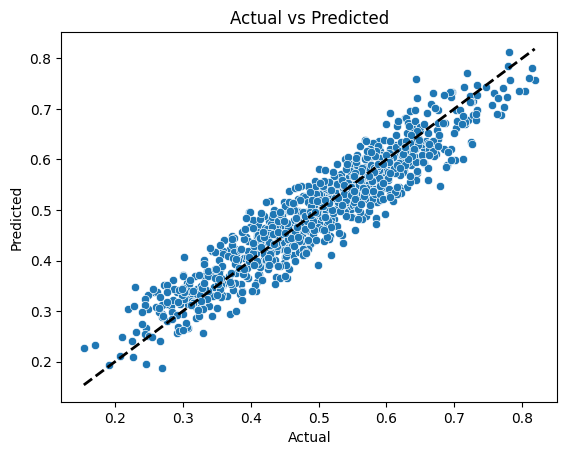

In [363]:
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

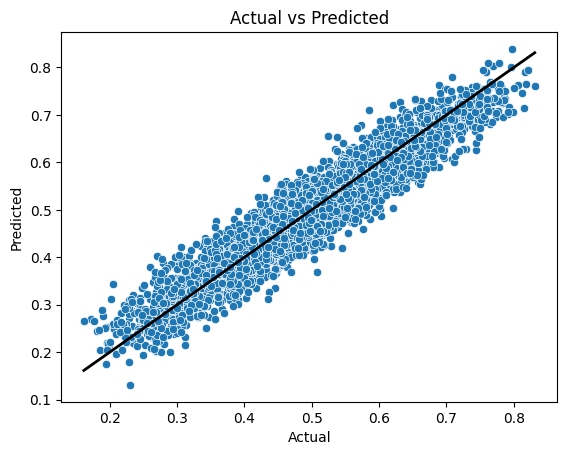

In [364]:
sns.scatterplot(x=y_train,y=y_pred1)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k-',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()